### Task # 1 using supervised ML 
### Author : Muhammad Ayyaz
### Problem : Predict score of the students based on the number of hours they studied

For this problem we will use python library scikit-learn to implement linear regression for prediction of the expected score of the students based on the hours they study.

## Importing essential libraries

In [67]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegressio
from sklearn.model_selection import train_test_split
sns.set()

## Loading data

In [68]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [101]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

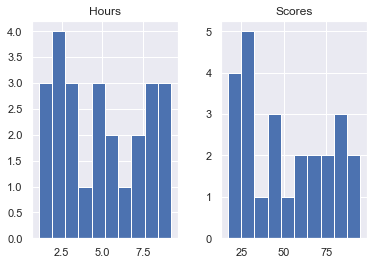

In [102]:
data.hist()

In [103]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


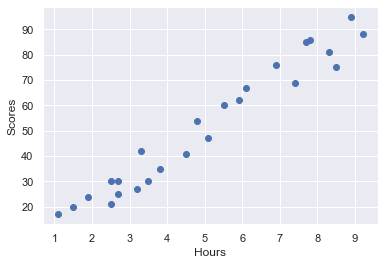

In [100]:
plt.scatter(data["Hours"],data["Scores"])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [69]:
x = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values  

### Train Test Split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Regression phase

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [79]:
y_predict=reg.predict(x_test)

In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Best Fit Line

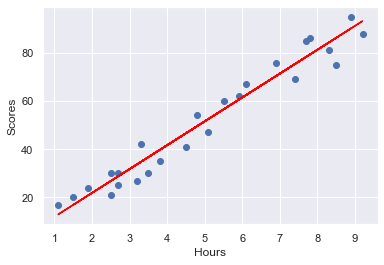

In [106]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x,y)
plt.plot(x,line, color = "red");
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Checking Model Accuracy

In [96]:
from sklearn.metrics import r2_score
r_squared = np.mean((y_test-y_predict)**2)
r2_scr = r2_score(y_test,y_predict)
print("R Squared Error: %0.2f"% r_squared)
print("r2 Score: %0.2f"% r2_scr)

R Squared Error: 21.60
r2 Score: 0.95


### Predicting Score through unseen data

In [86]:
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [97]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975
